In [21]:
# импорт необходимого + отключаем ворнинги в жупитере
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [63]:
# импорт встроенного датасета изображений цифр, разбиваем на 2 кортежа с тренировочными и тестовыми данными
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

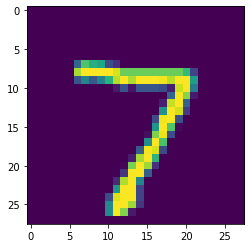

In [65]:
# отрисуем первое изображение в тестовых данных
plt.imshow(x_test[0], interpolation='nearest')

In [66]:
# семёрка. Выведем первый ответ из тестовых данных на первое изображение. Должна быть 7.
y_test[0]

7

In [3]:
# так как стоит задача классификации, то переводим категориальные данные из ответов в бинарный вектор и выведем пример
y_train_categ = keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test_categ = keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")
y_train_categ[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
# посмотрим, как сейчас выглядят данные первого изображения из тренировочного сета
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# массив из значений градаций серого от 0 до 255. Нормализуем его в диапазон от 0 до 1, разделив на 255 все данные
input_train = x_train / 255
input_test = x_test / 255

# другой способ (более технологичный) нормализации данных из библиотеки Keras:
# normalizer = preprocessing.Normalization()
# normalizer.adapt(x_train)
# normalizer.adapt(x_test)

In [7]:
# выведем тот же массив-изображение после нормализаци
input_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# на вход сверточной сети нужно подавать тензор размерности (число строк, число столбцов, канал)
# так как у нас изображение в оттенках серого, то имеем 1 канал (rgb-изображение - 3 канала и т.д.)
# воспользуемся одним из двух способов (numpy), приведённых ниже, чтобы изменить размерность наших массивов на тензор
# через метод расширения размерности:
x_train = np.expand_dims(input_train, axis=3)
x_test = np.expand_dims(input_test, axis=3)

# или через метод изменения формы:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

In [10]:
# теперь наш массив выглядит вот так
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [48]:
# отлично, подготовка данных завершена, приступим к написанию структуры сверточной нейросети
# создаём экземпляр класса модели последвательных слоёв
model = Sequential()
# намазываем свёрточный слой для 2-мерных массивов (изображений), прописываем параметры: 32 фильтра для сканирования матрицы;
# квадратами (3, 3); 'same' -параметр, добавляющий вокруг марицы дополнительный слой, для того, чтобы начальное изображение
# оставалось прежним (связано со способом сканирования фильтрами); инициализатор - алгоритм, помогающий правильно задать
# начальные веса и вычислить веса при обратном распространении ошибки; регуляризатор - доп. страховка от переобучения, 
# алогритм накладывает штрафы на веса, чтобы модель не акцентировалась на них, а 'видела картину' более обще;
# функция активации - relu(можно было пробнуть 'elu', но пересчитывание модели занимает полчаса);
# входная форма - наш тензор после расширения размерности
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001),
                 activation='relu', input_shape=(28, 28, 1)))
# вставляем слой батч-нормализации между слоями. При переходе сигнала через слои значения могут выйти за пределы диапазона
# от 0 до 1 и их нужно нормализовывать опять.
model.add(BatchNormalization())
# второй слой сверточной сети, он как первый, только второй
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001),
                 activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
# Макс-пулинг - выбирает из отсканированной фильтрами сетки в зоне 2 на 2 максимальные значения (признаки изображения) и 
# передаёт дальше. Сдвиг (смещение) при считывании - 2 квадрата
model.add(MaxPooling2D((2, 2), strides=2))
# метод выключения части нейронов, чтобы снизить их зацикленность на деталях и избежать переобучения модели
model.add(Dropout(0.25))
# данные выходят из слоёв свёрточной нейросети тензорами и попадают на выравниватель перед подачей в обычную нейросеть
# для дальнейшего обучения уже выделенным сврёточной нейростью признакам
model.add(Flatten())
# далее всё как в обычной нейросети, только добавлен инициализатор и регуляризатор, как в сверточной выше
model.add(Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0001), activation='softmax'))

In [49]:
# компилируем модель, стандартные параметры для задачи множественной классификации
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

In [50]:
# создаём экземпляр класса генератора изображений, который расширяет возможности для обучения модели, создавая дополнительные
# кондиции изображение (переворачивает их, меняет масштаб и т.д.) В некотором роде это позволяет сети ориентироваться на
# общие особенности, а не на чсности
# мы поменяем только масштаб изображения, все параметры можно найти в документации к Keras
datagen = ImageDataGenerator(
        width_shift_range=0.1, 
        height_shift_range=0.1) 
# фитим генератор данными  и вычисляем занчения, необходимые для нормализации расширенного изображения
datagen.fit(x_train) 
iterator = datagen.flow(x_train, y_train_categ,
                        batch_size=64)

# другие параметры генератора, описание в документации
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

In [54]:
# фитим модель, задавая в параметрах наш генератор, число шагов в эпохе (размер порций информации), кол-во эпох. Ждём
model.fit(iterator, steps_per_epoch=len(iterator),
                        epochs=7)

Epoch 1/7
938/938 [==============================] - 261s 278ms/step - loss: 0.2137 - accuracy: 0.9511
Epoch 2/7
938/938 [==============================] - 282s 301ms/step - loss: 0.1583 - accuracy: 0.9695
Epoch 3/7
938/938 [==============================] - 278s 296ms/step - loss: 0.1510 - accuracy: 0.9746
Epoch 4/7
938/938 [==============================] - 279s 297ms/step - loss: 0.1490 - accuracy: 0.9764
Epoch 5/7
938/938 [==============================] - 276s 295ms/step - loss: 0.1476 - accuracy: 0.9786
Epoch 6/7
938/938 [==============================] - 276s 294ms/step - loss: 0.1488 - accuracy: 0.9791
Epoch 7/7
938/938 [==============================] - 276s 294ms/step - loss: 0.1498 - accuracy: 0.9795


In [55]:
#  на i3 заняло около 20 минут. Оцениваем модель, задавая методу тестовые данные и ответы к ним
model.evaluate(x_test, y_test_categ)

313/313 [==============================] - 12s 36ms/step - loss: 0.1214 - accuracy: 0.9888


[0.12140324711799622, 0.9887999892234802]

In [ ]:
# 98.88 процентов точности. Отлично! По сравнению с обычной нейросетью прирос 1.3%. Дополнительно тут были использованы
# дропауты и генераторы изображения.

In [59]:
# посмотрим на предсказание модели, используя соотв. метод на тестовых данных (его первое значение) и округлим массив
model.predict(x_test)[0].round()

313/313 [==============================] - 11s 34ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [60]:
# восьмая едиинца означает 7, когда отсчёт начинается с нуля. Теперь выведем ответ из ответов.
y_test[0]

7

In [ ]:
# Итог: Применение сверточной сети (методов Dropout и генераторов) даёт заметное (по меркам статистики) 
# преимущество для анализа изображений.
# Также есть Conv1d и Conv3d для анализа одномерных данных (временных последовательностей) и 
# видео-файлов. 3D-изображений (графика, тамография) соответственно.